In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_csv("london_crime_by_lsoa.csv")

In [3]:
crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
crime.shape

(13490604, 7)

In [6]:
crime.columns.values 

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
crime.info

<bound method DataFrame.info of           lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                  

In [8]:
crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
crime['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [10]:
crime['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [11]:
crime['minor_category'].value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [12]:
#total crimes per borough
crime['Total']=crime.sum(axis=1)
crime.head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7428\1354863696.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime['Total']=crime.sum(axis=1)


,lsoa_code,borough,major_category,minor_category,value,year,month,Total
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2027
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2027
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2020
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2019
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2014
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5,2017
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7,2017
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4,2017
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9,2022
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8,2025


In [14]:
#(===QUESTION 1 ===)
crime_sum = crime.groupby (['minor_category', 'major_category', 'year'])['value'].sum()
crime_sum = crime.groupby('year')['value'].sum()
crime_sum

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [15]:
data_borough = crime[
    (crime['year']>2010)
].groupby(['borough'])['value'].sum()
data_borough

borough
Barking and Dagenham       96948
Barnet                    141382
Bexley                     71220
Brent                     153787
Bromley                   118904
Camden                    179721
City of London               780
Croydon                   171621
Ealing                    162638
Enfield                   129945
Greenwich                 121081
Hackney                   154222
Hammersmith and Fulham    120993
Haringey                  141688
Harrow                     75181
Havering                   94057
Hillingdon                137336
Hounslow                  127120
Islington                 153835
Kensington and Chelsea    113095
Kingston upon Thames       58311
Lambeth                   197565
Lewisham                  138369
Merton                     74623
Newham                    172934
Redbridge                 121200
Richmond upon Thames       64446
Southwark                 183396
Sutton                     63772
Tower Hamlets             160004
Wa

In [19]:
data_borough = crime[(crime['year']>2010)].groupby(['year', 'borough']).agg({'value' : 'sum'})
data_borough.head()

value
year borough                    
2011 Barking and Dagenham  16686
     Barnet                24007
     Bexley                11325
     Brent                 27669
     Bromley               19868

In [20]:
data_borough = crime.reset_index()[['borough', 'value']].groupby(['borough']).agg({'value': 'sum'})
data_borough.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


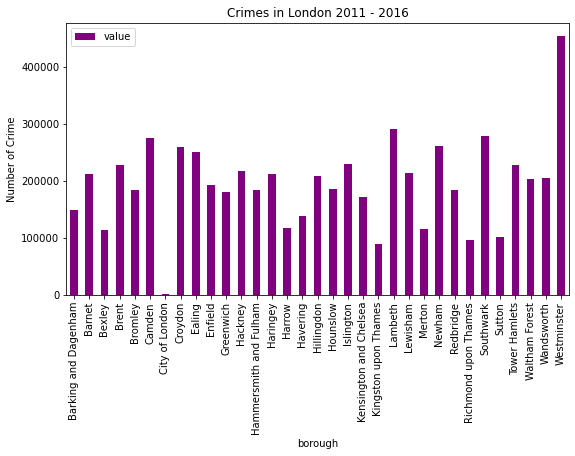

In [21]:
data_borough.plot(kind = 'bar', figsize=(9,5), color='purple')

plt.title('Crimes in London 2011 - 2016')
plt.xlabel('borough')
plt.ylabel('Number of Crime')

plt.show()

In [25]:
crime_major = crime[(crime['year'] > 2010)].groupby(['year', 'major_category']).agg({'value': 'sum'})
crime_major.head()

value
year major_category                  
2011 Burglary                   93315
     Criminal Damage            70914
     Drugs                      57550
     Fraud or Forgery               0
     Other Notifiable Offences  10264

In [26]:
crime_major = crime.reset_index()[['major_category', 'value']].groupby(['major_category']).agg({'value': 'sum'})
crime_major.head()

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349


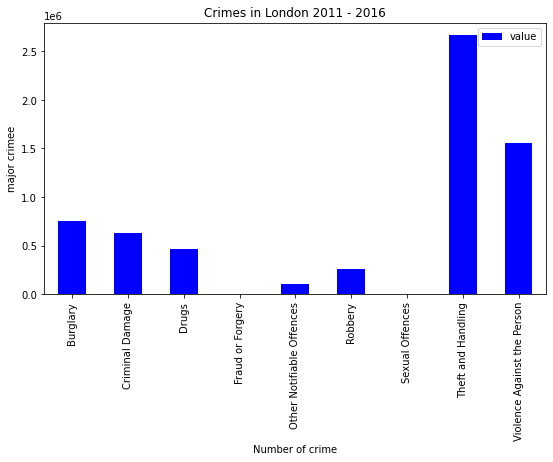

In [27]:
crime_major.plot(kind = 'bar', figsize=(9,5), color='blue')

plt.title('Crimes in London 2011 - 2016')
plt.xlabel('Number of crime')
plt.ylabel('major crimee')

plt.show()

In [28]:
crime_major.info

<bound method DataFrame.info of                                value
major_category                      
Burglary                      754293
Criminal Damage               630938
Drugs                         470765
Fraud or Forgery                5325
Other Notifiable Offences     106349
Robbery                       258873
Sexual Offences                 1273
Theft and Handling           2661861
Violence Against the Person  1558081>

In [30]:
#(===QUESTION 2 ===)
#Tindak kriminal yang paling sering terjadi per daerah di 2016

In [33]:
crime_2016 = crime[(crime['year']==2016)].groupby(['borough', 'major_category']).sum()['value'].sort_values(ascending=False)
crime_2016.head(3)

borough      major_category    
Westminster  Theft and Handling    27520
Camden       Theft and Handling    14088
Lambeth      Theft and Handling    13155
Name: value, dtype: int64

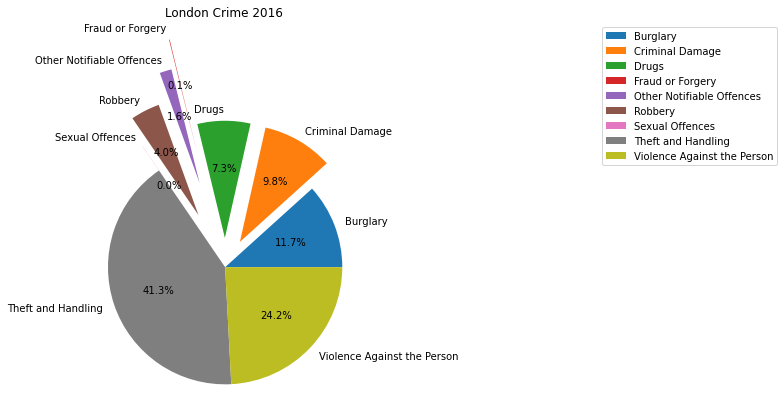

In [35]:
crime_2016 = crime.groupby(["major_category"])["value"].sum()
crime_2016.plot(kind="pie", autopct="%.1f%%", explode=[0,0.25,0.25,1,0.75,0.5,0.25,0,0] ,legend=True, ylabel="", rot=10, figsize=(5,7))
plt.legend(bbox_to_anchor=(2.5, 1.0))
plt.title('London Crime 2016')
plt.axis('equal') 
plt.show()

In [ ]:
#Tindak kriminal yang paling banyak terjadi di tahun 2016 adalah theft and handling sebesar 41.3% yang berada di wilayah westminster